In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import residuez
import pandas as pd
from IPython.display import display
from scipy.signal import dimpulse
import scipy.signal as sig



**Ejercicio 3:** 
Considere el sistema
H(z) = 1 −2z−1 + 2z−2 −z−3

$$ H(z) = \frac{ 1-2z^{-1} + 2z^{-2} - z^-3 }{ (1 − z^{-1})(1 − 0, 5z^{−1})(1 − 0, 2^{z−1}) } $$
1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema?
2. Determine la respuesta al impulso del sistema

**1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema? Paso a paso**
1. Representamos el numerador y el denominador de $H(z)$ como arreglos de coeficientes en potencias de $z^{-1}$.
$$D(z)=(1 − 1.5z^{−1} + 0.5z^{−2})( 1− 0.2z^{-1})= 1− 1.7z^{-1}+0.8z{−2}−0.1z^{−3}$$
Asi que:
$$H(z)=\frac{1−2z^{−1}+2z^{−2}−z^−3}{1−1.7z^{−1}+0.8z^{−2} −0.1z^{−3​}}$$

Como el grado del polinomio del numerador M (3) es igual al grado del denominador N(3), tenemos una fracción impropia. Realizamos una división larga para separar un término constante, que será el término directo K. Para tener que M es menor a N y podes usar fracciones parciales

Dividimos el numerador entre el denominador.Se dividen los coeficientes de la mayor potencia (en este caso z−3):
$$K=\frac{coeficiente \ de \ z^{−3} \ en \ el \ denominador}{ coeficiente \ de \ z^{−3} \ en \ el \ numerador​}=\frac{-1}{-0.1}​=10$$

Este término $K=10$ es la primera parte de nuestra respuesta. Ahora, restamos este término para obtener una fracción propia: $$H(z)=H​(z) - 10$$

$$H(z)=\frac{1−2z^{−1}+2z^{−2}−z^−3}{1−1.7z^{−1}+0.8z^{−2} −0.1z^{−3​}} - 10 \frac{D(z)}{D(z)}$$
Desarrollando miembro a miembro.
$$ H(z) = 10 + \frac{ -9 + 15z^{-1} - 6z^{-2}}{ (1-z^{-1})(1-0.5z^{-1})(1-0.2z^{-1})} $$
Buscamos las fracciones parciales de la forma:
$$ \frac{-9 + 15z^{-1} - 6z^{-2}}{(1 - z^{-1})(1 - 0.5z^{-1})(1 - 0.2z^{-1})} = \frac{A_1}{1 - z^{-1}} + \frac{A_2}{1 - 0.5z^{-1}} + \frac{A_3}{1 - 0.2z^{-1}}$$


**2. Encontramos las raíces del numerador (los ceros) y las raíces del denominador (los polos).**

$$zeros = np.roots(numerador)$$
$$polos = np.roots(denominador)$$

Usamos los polos $[1. \  0.5 \ 0.2] $ para evaluar en las fracciones parciales:

$$ H(z) = 10 + \frac{0}{1 - z^{-1}} + \frac{5}{1 - 0.5z^{-1}} + \frac{-14}{1 - 0.2z^{-1}}$$

Usando la relacion:
$$x[n]=a^n u[n]$$ 

$$ Aa^n u[n]⟺ \frac{A}{1-z^{-1}}$$

**2. Determine la respuesta al impulso del sistema** 
Obtenemos la repuesta al impulso:

$$h[n]=10δ[n]+5(0.5)^n u[n] − 14(0.2)^n u[n]$$

3. Graficamos los polos y ceros en el plano Z. Un círculo de radio 1 (el "círculo unitario") se dibuja como referencia para el análisis de estabilidad.
4. Conclusión de Estabilidad: El sistema no es estrictamente estable, sino marginalmente estable. Esto se debe a que tiene un polo en $z=1$, que se encuentra sobre el círculo unitario. Los otros dos polos $z=0.5$ y $z=0.2$ están dentro del círculo unitario. Un sistema marginalmente estable no tendrá una respuesta al impulso que decaiga a cero y puede oscilar indefinidamente.



,Tipo,Coeficientes
0,Numerador,"[1, -2, 2, -1]"
1,Denominador,"[1.0, -1.7, 0.8, -0.1]"


,Polos,Magnitud del Polo,Ceros
0,1.0,1.0,1.0000 + 0.0000j
1,0.5,0.5,0.5000 + 0.8660j
2,0.2,0.2,0.5000 + -0.8660j


El sistema es INESTABLE (al menos un polo fuera del círculo unitario).
Resultados de la Expansión en Fracciones Parciales


,Polos (P),Residuos (R)
0,0.2,-1.400000e+01
1,0.5,5.000000e+00
2,1.0,-8.881784e-15


Términos Directos (K): [10.]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


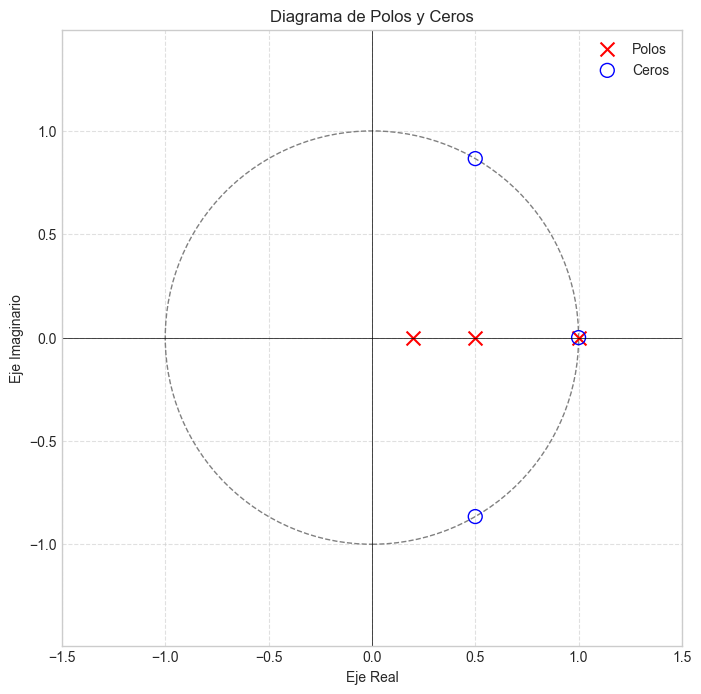

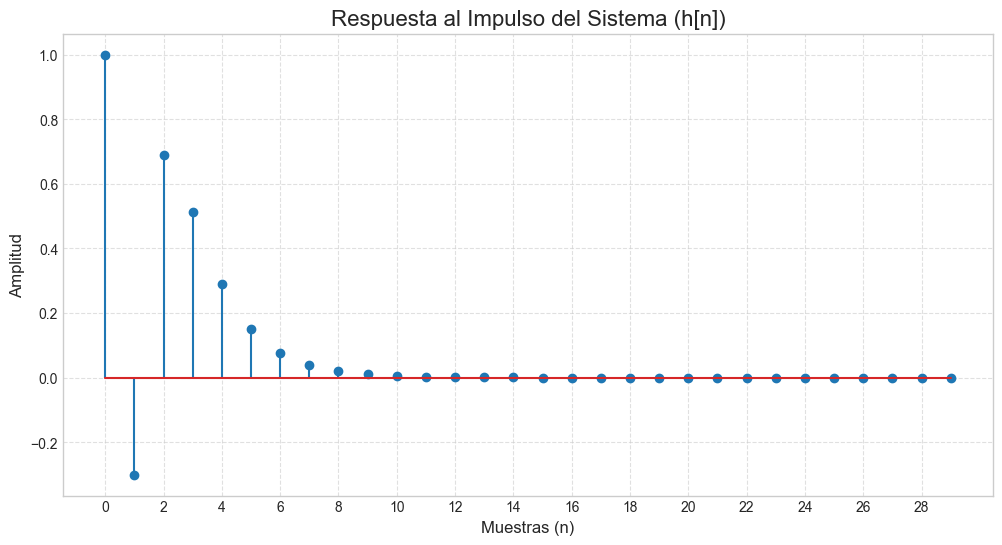

In [32]:
numerador = [1, -2, 2, -1]
denominador1 = [1, -1]      # (1 - z^-1)
denominador2 = [1, -0.5]    # (1 - 0.5z^-1)
denominador3 = [1, -0.2]    # (1 - 0.2z^-1)

# Multiplicar los polinomios del denominador
denominador_temp = np.polymul(denominador1, denominador2)
denominador = np.polymul(denominador_temp, denominador3)

coeff_df = pd.DataFrame({
    'Tipo': ['Numerador', 'Denominador'],
    'Coeficientes': [list(numerador), list(np.round(denominador, 4))]
})
display(coeff_df)

zeros = np.roots(numerador)
polos = np.roots(denominador)
polo_magnitud = np.abs(polos)

analysis_data = {
    'Polos': polos,
    'Magnitud del Polo': polo_magnitud,
    # Complejo se redondea para mejor visualización
    'Ceros': [f'{z.real:.4f} + {z.imag:.4f}j' for z in zeros]
}
analysis_df = pd.DataFrame(analysis_data)
display(analysis_df)

if np.all(polo_magnitud < 1):
    print(" El sistema es ESTABLE.")
elif np.any(polo_magnitud > 1):
    print("El sistema es INESTABLE (al menos un polo fuera del círculo unitario).")
else:
    print("El sistema es MARGINALMENTE ESTABLE (al menos un polo en el círculo unitario y ninguno fuera).")


R, P, K = residuez(numerador, denominador)

print("Resultados de la Expansión en Fracciones Parciales")
pfe_df = pd.DataFrame({
    'Polos (P)': P,
    'Residuos (R)': R
})
display(pfe_df)

print(f"Términos Directos (K): {K}")

plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='gray', facecolor='none', linestyle='--')
ax.add_patch(circ)
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='r', s=100, label='Polos')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', s=100, facecolors='none', label='Ceros')
plt.title('Diagrama de Polos y Ceros')
plt.xlabel('Eje Real')
plt.ylabel('Eje Imaginario')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

# Usamos dimpulse para calcular la respuesta al impulso
# El sistema se define por (numerador, denominador, tiempo de muestreo=1)
# n=30 especifica que queremos calcular las primeras 30 muestras
n_muestras = 30
t, h = dimpulse((numerador, denominador, 1), n=n_muestras)

# Graficar la respuesta al impulso usando un stem plot
plt.figure(figsize=(12, 6))
plt.stem(t, np.squeeze(h))
plt.title('Respuesta al Impulso del Sistema (h[n])', fontsize=16)
plt.xlabel('Muestras (n)', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.xticks(np.arange(0, n_muestras, step=2))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Ejercicio 4:**
 Considere el sistema continuo
 $$H(s) = \frac{12500s}{44s^2 + 60625^s + 625 ·10^4}$$
y obtenga la función de transferencia H(z) del sistema discreto correspon-
diente, mediante la utilización de las transformaciones conformes de Euler y
Bilineal. Para ello:

**1. Determine la frecuencia de corte del sistema continuo (frecuencia donde
la respuesta cae 3 dB respecto al valor m ́aximo) y utilice, para aplicar
las transformaciones conformes, una frecuencia de muestreo cuatro veces
superior a  ́esta.**


El objetivo de este ejercicio es convertir un sistema de tiempo continuo, definido por H(s), en un sistema de tiempo discreto, H(z), utilizando dos métodos diferentes. Luego, se analizará si el proceso fue exitoso.

Necesitamos encontrar la frecuencia de corte (f_c) del sistema original. Esta es la frecuencia en la que la magnitud de la respuesta cae 3 decibelios (dB) por debajo de su valor máximo. A partir de f_c, calcularemos la frecuencia de muestreo (f_s) como cuatro veces su valor, tal como lo indica el enunciado.

Con la frecuencia de muestreo ya definida, procedemos a discretizar el sistema usando las dos transformaciones conformes solicitadas. 

Transformación Bilineal
$$ s = \frac{2}{T} \frac{1-z^{-1}}{1+z^{-1}}$$
Reemplazando s tenemos:
$$
H(z) = \frac{12500 \left( \frac{2}{T} \frac{z-1}{z+1} \right)}{44 \left( \frac{2}{T} \frac{z-1}{z+1} \right)^2 + 60625 \left( \frac{2}{T} \frac{z-1}{z+1} \right) + 6250000}
$$

$$ H_{bilineal}(z) = \frac{0.1878z^2 − 0.1878}{z^2 - 1.139z + 0.6355 } $$

Transformación Euler:
$$ s = \frac{1}{1-z^{-1}T} $$
Reemplazamos :
$$H_{Euler​}(z)=\frac{0.003926z - 0.003926​} {z^2 - 1.487z + 0.5594} $$


**2. Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos
y comp ́arelas con la del sistema continuo. Determine si la frecuencia
de muestreo empleada permite obtener la respuesta esperada mediante
ambas transformaciones conformes**

a respuesta del sistema obtenido por la transformación bilineal (línea de puntos) sigue de forma casi perfecta a la del sistema continuo. En contraste, la respuesta del sistema de Euler (línea discontinua) muestra una distorsión considerable, con menor ganancia y una forma alterada.

Se determina si la frecuencia de muestreo f_s=4f_c fue adecuada para cada método.

Para la Transformación Bilineal: SÍ
Este método es robusto porque mapea correctamente todo el eje de frecuencias imaginario al círculo unitario. La gráfica confirma que con f_s=4f_c, la respuesta esperada se obtiene con alta fidelidad.

Para la Transformación de Euler: NO
El mal resultado tiene una justificación teórica. La aproximación de Euler solo es aceptable cuando el ángulo digital normalizado theta es pequeño, específicamente $\theta$ \< $\pi/6$ radianes. En nuestro caso, el ángulo en la frecuencia de corte es:
$$θ_c​=\frac{2πf_c​​}{f_s}​​=\frac{2\pi f_c}{4f_c}​​=π/2​ \ radianes$$
Dado que nuestro ángulo (pi/2) es significativamente mayor que el límite recomendado (pi/6), la condición no se cumple. Esto explica teóricamente la gran distorsión que se observa en la gráfica y confirma que la frecuencia de muestreo empleada no permite obtener la respuesta esperada mediante esta transformación

,Parámetro,Valor
0,Frecuencia de Corte (fc),15.3042 Hz
1,Frecuencia de Muestreo (fs),61.2169 Hz
2,Período de Muestreo (T),0.016335 s
3,"Coefs. Numerador Bilineal (b0, b1, b2)","[0.1068, 0.0, -0.1068]"
4,"Coefs. Denominador Bilineal (a0, a1, a2)","[1.0, 0.7801, -0.0358]"
5,"Coefs. Numerador Euler (b0, b1, b2)","[0.0756, -0.0756, 0.0]"
6,"Coefs. Denominador Euler (a0, a1, a2)","[1.0, -0.3991, 0.0163]"


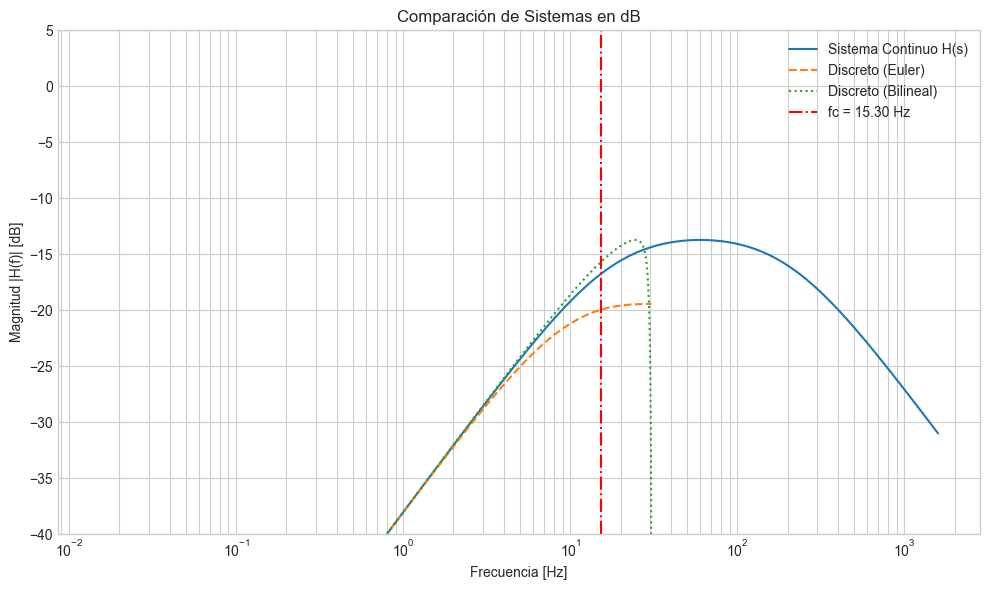

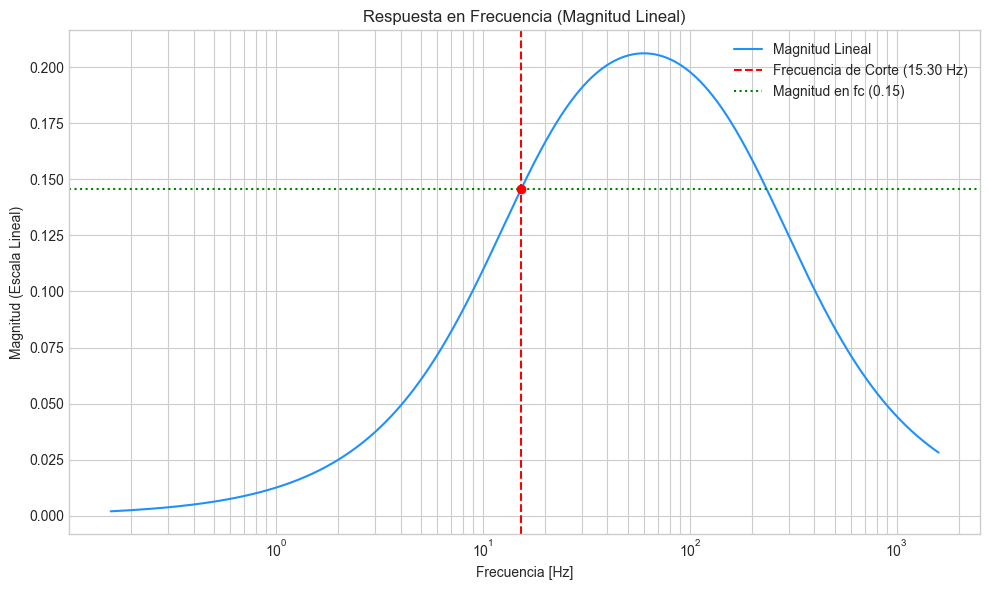

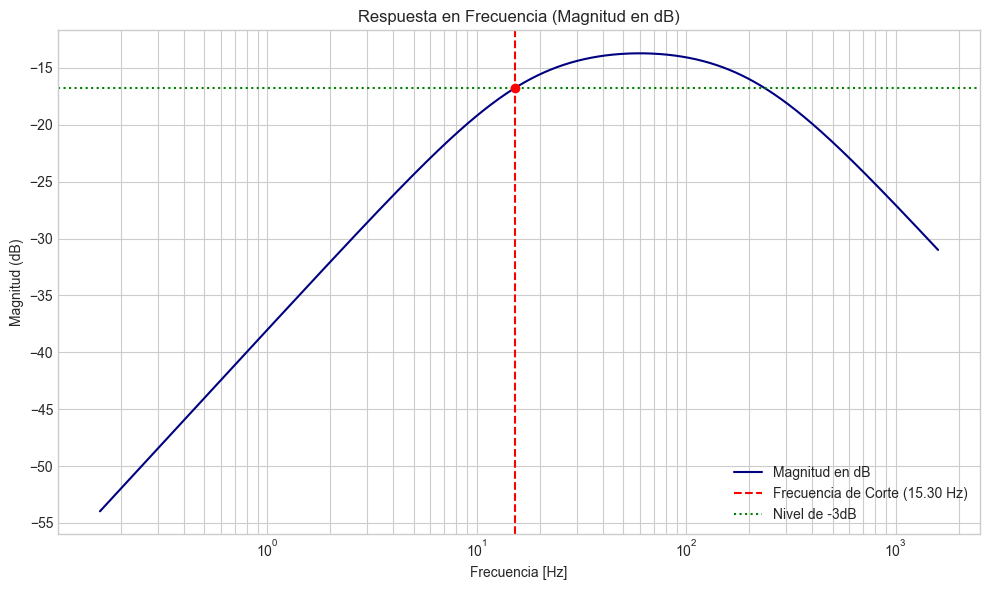

In [ ]:


pi = np.pi
# Coeficientes de H(s) para las funciones de SciPy
num_s = [12500, 0]
den_s = [44, 60625, 6250000]

# Análisis manual para encontrar fc
w = np.logspace(0, 4, 2000)
frecuencias_continuas = w / (2 * pi)
s = 1j * w
H_s = (12500 * s) / (44 * s**2 + 60625 * s + 625 * 10**4)
H_s_abs = np.abs(H_s)

# Cálculo de la frecuencia de corte
max_mag_lineal = np.max(H_s_abs)
mag_3db_lineal = max_mag_lineal / np.sqrt(2)
indiceFc = np.argmin(np.abs(H_s_abs - mag_3db_lineal))
fc = frecuencias_continuas[indiceFc]

# --- Paso 2: Cálculo de Parámetros de Discretización ---
fm = 4 * fc
T = 1 / fm

# --- Paso 3: Cálculo de los Coeficientes de las Funciones Discretas H(z) ---

# Coeficientes para la Transformación Bilineal (usando SciPy)
num_z_bilinear, den_z_bilinear = sig.bilinear(num_s, den_s, fs=fm)

# Coeficientes para la Transformación de Euler (cálculo manual)
A, B, C, D = num_s[0], den_s[0], den_s[1], den_s[2]
den_euler_unnormalized = [(B + C*T + D*(T**2)), (-2*B - C*T), B]
# Normalizamos para que el primer coeficiente del denominador sea 1
norm_factor = den_euler_unnormalized[0]
num_z_euler = np.array([A * T, -A * T, 0]) / norm_factor
den_z_euler = np.array(den_euler_unnormalized) / norm_factor

data = {
    "Parámetro": [
        "Frecuencia de Corte (fc)",
        "Frecuencia de Muestreo (fs)",
        "Período de Muestreo (T)",
        "Coefs. Numerador Bilineal (b0, b1, b2)",
        "Coefs. Denominador Bilineal (a0, a1, a2)",
        "Coefs. Numerador Euler (b0, b1, b2)",
        "Coefs. Denominador Euler (a0, a1, a2)"
    ],
    "Valor": [
        f"{fc:.4f} Hz",
        f"{fm:.4f} Hz",
        f"{T:.6f} s",
        np.round(num_z_bilinear, 4),
        np.round(den_z_bilinear, 4),
        np.round(num_z_euler, 4),
        np.round(den_z_euler, 4)
    ]
}

df_results = pd.DataFrame(data)
display(df_results)
# --- Paso 5: Cálculo de las Respuestas para Graficar ---
epsilon = 1e-9 
frecuencias_digitales = np.linspace(0, fm / 2, len(w))
omega_digital = 2 * pi * frecuencias_digitales
z = np.exp(1j * omega_digital * T)
# ---------- Transformación Bilineal ----------
s_bilineal = (2 / T) * (z - 1) / (z + 1 + epsilon)
H_bilineal = (12500 * s_bilineal) / (44 * s_bilineal**2 + 60625 * s_bilineal + 625 * 10**4)
# ---------- Transformación de Euler ----------
s_euler = (z - 1) / (T * z + epsilon)
H_euler = (12500 * s_euler) / (44 * s_euler**2 + 60625 * s_euler + 625 * 10**4)


# --- Paso 6: Generación de Gráficas ---
plt.style.use('seaborn-v0_8-whitegrid')
# Gráfica 1: Comparativa General en dB
plt.figure(figsize=(10, 6))
plt.semilogx(frecuencias_continuas, 20 * np.log10(H_s_abs), label='Sistema Continuo H(s)')
plt.semilogx(frecuencias_digitales, 20 * np.log10(np.abs(H_euler) + epsilon), linestyle='--', label='Discreto (Euler)')
plt.semilogx(frecuencias_digitales, 20 * np.log10(np.abs(H_bilineal) + epsilon), linestyle=':', label='Discreto (Bilineal)')
plt.axvline(fc, color='red', linestyle='-.', label=f'fc = {fc:.2f} Hz')
plt.title('Comparación de Sistemas en dB')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud |H(f)| [dB]')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.ylim(-40, 5)
plt.tight_layout()
plt.show()
# --- Gráfica 2: Magnitud Lineal con Frecuencia de Corte Marcada ---
plt.figure(figsize=(10, 6))
plt.semilogx(frecuencias_continuas, H_s_abs, color='dodgerblue', label='Magnitud Lineal')
plt.title('Respuesta en Frecuencia (Magnitud Lineal)')
plt.ylabel('Magnitud (Escala Lineal)')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(fc, color='red', linestyle='--', label=f'Frecuencia de Corte ({fc:.2f} Hz)')
plt.axhline(mag_3db_lineal, color='green', linestyle=':', label=f'Magnitud en fc ({mag_3db_lineal:.2f})')
plt.plot(fc, mag_3db_lineal, 'ro')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.tight_layout()
plt.show()

# --- Gráfica 3: Magnitud en dB con Frecuencia de Corte Marcada ---
plt.figure(figsize=(10, 6))
plt.semilogx(frecuencias_continuas, 20 * np.log10(H_s_abs), color='navy', label='Magnitud en dB')
plt.title('Respuesta en Frecuencia (Magnitud en dB)')
plt.ylabel('Magnitud (dB)')
plt.xlabel('Frecuencia [Hz]')
plt.axvline(fc, color='red', linestyle='--', label=f'Frecuencia de Corte ({fc:.2f} Hz)')
plt.axhline(20*np.log10(mag_3db_lineal), color='green', linestyle=':', label=f'Nivel de -3dB')
plt.plot(fc, 20*np.log10(mag_3db_lineal), 'ro')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.tight_layout()
plt.show()